In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

In [3]:
%pwd

'C:\\Users\\dadra\\Desktop\\testing\\trials'

In [4]:
tows = pd.read_csv("../static/data/finalTOWING.csv")

In [5]:
# one location in the Pembina emergency is outside the Minneapolis area 
tows.longitude.idxmin()

8496

In [6]:
tows.drop(8496, inplace=True)

In [7]:
# there is still some data cleaning needed:  community names with inconsistent names
community = tows.community
community.replace({'Calhoun Isle' : 'Calhoun-Isles', 'Calhoun Isles': 'Calhoun-Isles', 'Near-North': 'Near North'}, inplace=True)
tows.community = community

In [8]:
xtabs = pd.crosstab(tows.community, tows.emergency)

In [9]:
xtabs

emergency,Armatage,Dana,Diamond Lake,Ferry,Howe,Jane,Olive,Pembina,Quincy,Upton,Westminster,Xerxes,Yale,Yardville
community,,,,,,,,,,,,,,
Calhoun-Isles,102,125,69,196,60,111,124,84,48,51,88,141,80,50
Camden,69,74,53,43,49,80,39,37,52,75,75,47,63,36
Central,108,178,136,170,93,146,149,104,82,128,86,110,67,89
Longfellow,34,37,4,23,54,34,21,39,23,33,48,11,55,35
Near North,150,291,184,215,151,180,190,169,99,105,152,167,132,87
Nokomis,22,25,35,23,11,13,21,35,14,21,17,37,22,19
Northeast,123,158,125,165,73,172,140,71,69,88,128,129,114,86
Phillips,0,23,35,30,1,17,6,2,4,16,14,8,2,19
Powderhorn,181,204,144,166,141,281,225,181,140,113,175,204,165,115


<Figure size 1440x864 with 0 Axes>

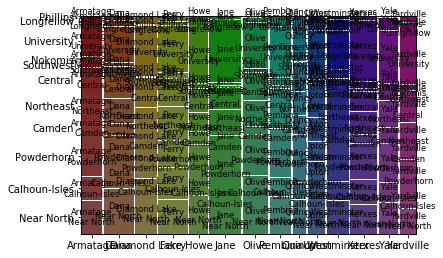

In [10]:
plt.figure(figsize=(20,12))
im1 = mosaic(tows, ['emergency', 'community'])


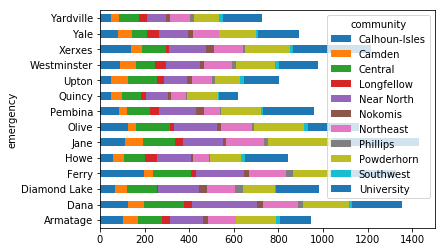

In [16]:
ytabs = pd.crosstab(tows.emergency, tows.community)
ytabs.plot(kind='barh', stacked=True)

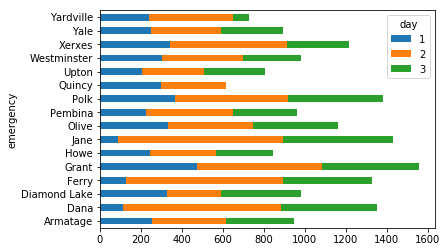

In [17]:
dtabs = pd.crosstab(tows.emergency, tows.day)
dtabs.plot(kind='barh', stacked=True)

In [19]:
import statsmodels.api as sm
sample_crosstable = sm.stats.Table(pd.crosstab(tows.day, tows.emergency).values)

In [23]:
crosstable = pd.crosstab(tows.day, tows.emergency)
crosstable

emergency,Armatage,Dana,Diamond Lake,Ferry,Grant,Howe,Jane,Olive,Pembina,Polk,Quincy,Upton,Westminster,Xerxes,Yale,Yardville
day,,,,,,,,,,,,,,,,
1,253,113,326,125,476,245,90,331,224,365,296,205,305,342,250,239
2,362,771,267,769,607,320,804,418,423,554,321,305,393,573,341,411
3,333,470,389,434,473,279,536,412,314,461,0,295,282,300,303,78


In [20]:
# Produce the SVD of the matrix of residuals
u,s,vh = np.linalg.svd(sample_crosstable.resid_pearson, full_matrices=False)

In [21]:
row_scores = np.dot(u, np.diag(np.sqrt(s)))
col_scores = np.dot(vh.T, np.diag(np.sqrt(s)))

In [24]:
rows_df = pd.DataFrame(data=[l[0:2] for l in row_scores], columns=['R1', 'R2'])
rows_df['day'] = crosstable.index
rows_df

,R1,R2,day
0,-4.835600,0.194417,1
1,1.931601,-3.057911,2
2,1.968453,3.478256,3


In [25]:
cols_df = pd.DataFrame(data = [l[0:2] for l in col_scores], columns=['C1', 'C2'])
cols_df['emergency'] =  crosstable.columns
cols_df

,C1,C2,emergency
0,-0.269594,0.776438,Armatage
1,2.438319,-0.712847,Dana
2,-1.080852,1.969832,Diamond Lake
3,2.240588,-0.988218,Ferry
4,-1.012740,0.412744,Grant
5,-0.545003,0.587834,Howe
6,2.844829,-0.385388,Jane
7,-0.549699,1.064604,Olive
8,0.141902,0.156784,Pembina
9,-0.301344,0.594339,Polk


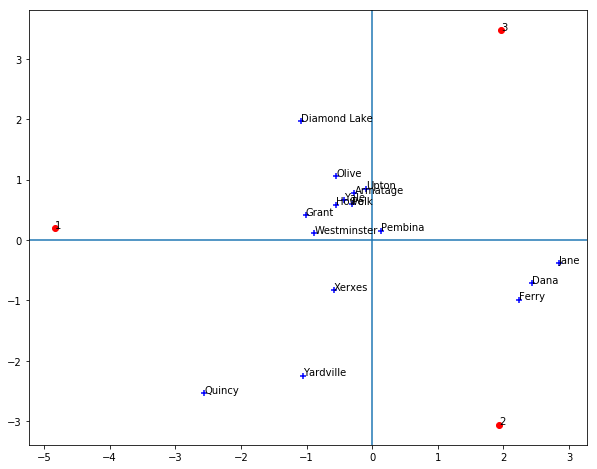

In [26]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(1,1,1)
ax1.axvline(x=0)
ax1.axhline(y=0)
ax1.scatter(rows_df.R1, rows_df.R2, color='red', marker='o')
for x, y, txt in zip(rows_df.R1, rows_df.R2, rows_df.day):
    ax1.annotate(txt, (x, y))
ax1.scatter(cols_df.C1, cols_df.C2, color='blue', marker='+')
for x, y, txt in zip(cols_df.C1, cols_df.C2, cols_df.emergency):
    ax1.annotate(txt, (x, y))

In [27]:
tows.head()

,emergency,date,address,ward,neighborhood,community,latitude,longitude,other_x,other_y,day,tow_zone
0,Armatage,2/24/19,"2101 LYNDALE AVE N ,Minneapolis,MN",5.0,Hawthorne,Near North,45.000250,-93.287993,NaN,NaN,1,1.0
1,Armatage,2/24/19,"2101 LYNDALE AVE N ,Minneapolis,MN",5.0,Hawthorne,Near North,45.000250,-93.287993,NaN,NaN,1,1.0
2,Armatage,2/24/19,"2806 EMERSON AVE S,Minneapolis,MN",10.0,Lowry Hill East,Calhoun-Isles,44.951599,-93.294638,NaN,NaN,1,3.0
3,Armatage,2/24/19,"2901 Lyndale Ave n ,Minneapolis,MN",5.0,Hawthorne,Near North,45.009708,-93.288395,NaN,NaN,1,1.0
4,Armatage,2/24/19,"2800 Emerson Avenue South,Minneapolis,MN",10.0,Lowry Hill East,Calhoun-Isles,44.951578,-93.294725,NaN,NaN,1,3.0


In [28]:
type(tows.date[0])

str

In [29]:
import datetime

In [30]:
import dateutil.parser

In [31]:
parser(tows.date[0])

NameError: name 'parser' is not defined

In [32]:
parser.parse?

Object `parser.parse` not found.


In [33]:
parser.parser?

Object `parser.parser` not found.


In [37]:
dateutil.parser.parse(tows.date[0]).weekdayday()

6

In [39]:
day_dict = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

In [42]:
def convert_to_weekday (date):
    return day_dict[dateutil.parser.parse(date).weekday()]

In [43]:
convert_to_weekday(tows.date[0])

'Sunday'

In [44]:
weekdays = [convert_to_weekday(date) for date in tows.date]

In [45]:
tows['weekday'] = weekdays

In [46]:
pd.crosstab(tows.weekday, tows.emergency)

emergency,Armatage,Dana,Diamond Lake,Ferry,Grant,Howe,Jane,Olive,Pembina,Polk,Quincy,Upton,Westminster,Xerxes,Yale,Yardville
weekday,,,,,,,,,,,,,,,,
Friday,0,0,0,0,0,0,536,0,0,0,0,446,0,132,303,0
Monday,535,771,488,434,0,486,0,104,68,0,101,0,0,0,0,510
Saturday,0,0,0,125,0,0,0,0,0,0,0,295,0,709,0,0
Sunday,80,113,105,769,0,79,0,0,0,0,0,0,0,374,0,103
Thursday,0,0,0,0,473,0,804,0,0,461,0,64,282,0,515,0
Tuesday,333,470,389,0,171,279,0,645,579,149,516,0,92,0,0,115
Wednesday,0,0,0,0,912,0,90,412,314,770,0,0,606,0,76,0
